In [1]:
!python3.9 -m pip install matplotlib-label-lines

In [2]:
import numpy as np
import pandas as pd
import itertools

import matplotlib.pyplot as plt
import seaborn as sns
from labellines import labelLine, labelLines
%matplotlib inline

In [6]:
small=pd.read_csv("../data/hrr_small_count.csv")
small = small[["probe_id","memory_length","memorized_pairs","correct_revive"]]
small

,probe_id,memory_length,memorized_pairs,correct_revive
0,0,10,1,True
1,0,10,1,True
2,1,10,1,True
3,1,10,1,True
4,2,10,1,True
...,...,...,...,...
478579,35,340,14,True
478580,35,340,14,True
478581,35,340,14,True
478582,35,340,14,True


# Results - small

In [9]:
correct_revive_small = small.groupby(['memory_length',"memorized_pairs"])
correct_revive_small = correct_revive_small['correct_revive'].value_counts(normalize=True).to_frame()
correct_revive_small

correct_revive
memory_length memorized_pairs correct_revive                
10            1               True                  0.935000
                              False                 0.065000
              2               True                  0.753000
                              False                 0.247000
              3               True                  0.611776
...                                                      ...
340           12              False                 0.005952
              13              True                  0.992110
                              False                 0.007890
              14              True                  0.993056
                              False                 0.006944

[821 rows x 1 columns]

In [30]:
correct_recall_per_probe = small[['memory_length', "memorized_pairs", 'correct_revive']]
correct_recall_per_probe = correct_recall_per_probe.groupby(['memory_length', "memorized_pairs"])
correct_recall_per_probe = correct_recall_per_probe['correct_revive'].value_counts(normalize=True)
correct_recall_per_probe.name = 'correct_prob'
correct_recall_per_probe = correct_recall_per_probe.to_frame().reset_index()
correct_recall_per_probe = correct_recall_per_probe[correct_recall_per_probe['correct_revive']==True].drop("correct_revive", axis=1)
correct_recall_per_probe

,memory_length,memorized_pairs,correct_prob
0,10,1,0.935000
2,10,2,0.753000
4,10,3,0.611776
7,10,4,0.464000
9,10,5,0.406000
...,...,...,...
812,340,10,1.000000
813,340,11,0.997036
815,340,12,0.994048
817,340,13,0.992110


Text(0.5, 1.0, 'How memory length influence abilty to recall')

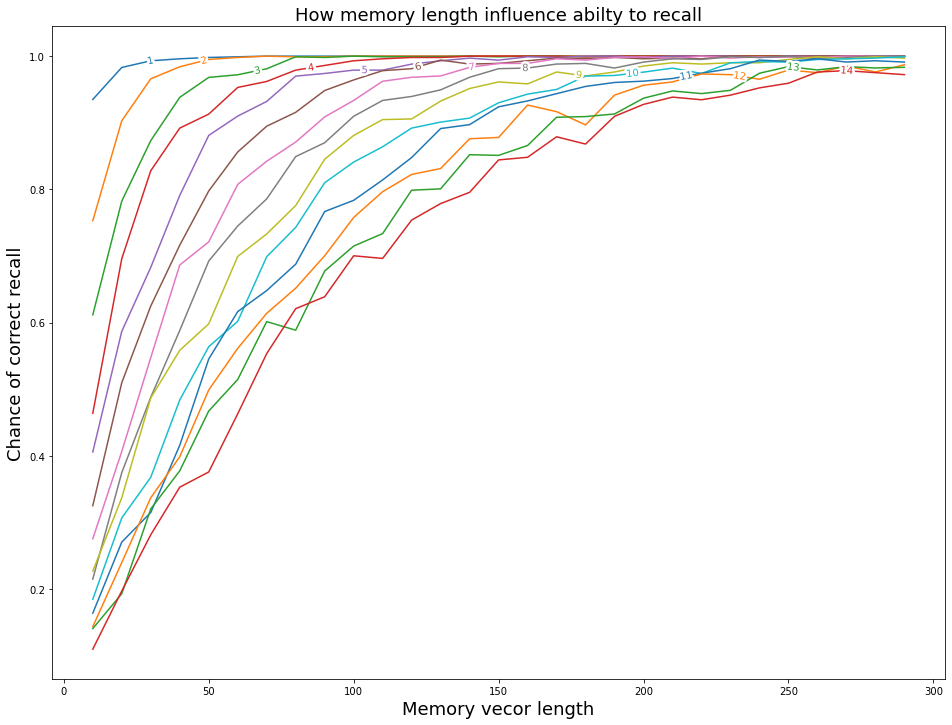

In [31]:
plt.figure(figsize=(16, 12))
correct_recall_per_probe = correct_recall_per_probe.loc[(correct_recall_per_probe['memory_length']<300)]
for name, group in correct_recall_per_probe.groupby("memorized_pairs"):
    plt.plot(group['memory_length'],group['correct_prob'], label=name)
labelLines(plt.gca().get_lines(),zorder=2.5)
plt.xlabel("Memory vecor length",fontsize=18)
# plt.xscale('log')
plt.ylabel("Chance of correct recall",fontsize=18)
plt.title("How memory length influence abilty to recall", fontsize=18)